In [1]:
import random as rd
from typing import Tuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Q1

Com base na seção 9.3 do livro "CHAOS: An Introduction to Dynamical Systems, Alligood, Sauer and Yorke, Springer, 
1996", estudaremos o sistema de equações de Rössler: 
$$
\Dot{x} = -y -z
$$

$$
\Dot{y} = x + ay
$$

$$
\Dot{z} = b + (x-c)z
$$

a) Primeiro iremos simular numericamente as equações para diferentes parâmetros de $c$, mantendo os valores $a=b=0.1$.

In [22]:
def ros (x:float,y:float,z:float,c: float) -> Tuple[float,float,float]:
    xt = -y -z
    yt = x + 0.1*y
    zt = 0.1 +(x-c)*z
    
    return (xt,yt,zt)

A partir dessa equação, iremos usar o método de rk4 partindo de condições iniciais para fazer os cálculos numéricos desse sistema de equações:


In [23]:
def rk4 (x: float, y: float, z: float, c: float, n: int,  dt: float) -> Tuple[float,float,float]:
    for i in range (n):
        (xa,ya,za) = ros(x,y,z,c)
        (xb,yb,zb) = ros(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,c)
        (xc,yc,zc) = ros(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,c)
        (xd,yd,zd) = ros(x+dt*xc,y+dt*yc,z+dt*zc,c)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
        yield (x,y,z)

#dt = tamanho do passo de integração
#n = número de pontos (x,y,z) que são calculados

In [113]:
def plot3d (c, n, dt,N,s):
    rd.seed(s)
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    for i in range(N):
        x0 = rd.randint(-10,10) 
        y0 = rd.randint(-10,10)
        z0 = rd.randint(-1,1)
        (X,Y,Z) = zip(*rk4(x0,y0,z0,c,n,dt))
        ax.plot ( X, Y, Z, linewidth = 0.5)
    ax.grid ( True )
    ax.set_xlabel ( 'x' )
    ax.set_ylabel ( 'y' )
    ax.set_zlabel ( 'z' )
    ax.set_title ( 'Atrator de Rossler 3D Plot' )
    
    #plt.savefig ( 'lorenz_ode_3d.png' )
    
    # Make the line multi-coloured by plotting it in segments of length s which
    # change in colour across the whole time series.
    #s = 100
    #c = np.linspace(0,1,n) #number of time points
    #for i in range(0,n-s,s):
    #    ax.plot(X[i:i+s+1], Y[i:i+s+1], Z[i:i+s+1], color=(1,c[i],0), alpha=0.5)
        
        
    # Remove all the axis clutter, leaving just the curve.
    #ax.set_axis_off()
    plt.show ( )
    return 


def plot2d_rand(c,n,dt,N,s):
    rd.seed(s)
    for i in range(N):
        x0 = rd.randint(-10,10) 
        y0 = rd.randint(-10,10)
        z0 = rd.randint(-1,1)
        (X,Y,Z) = zip(*rk4(x0,y0,z0,c,n,dt))
        plt.plot(X, Y, ',')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Atrator de Rossler')
    
    #plt.savefig ( 'r0_2d.png' )
    
    plt.show()
    
    return

def plot2d(x0,y0,z0,c,n,dt,N):
    for i in range(N):
        (X,Y,Z) = zip(*rk4(x0,y0,z0,c,n,dt))
        plt.plot(X[-10000:], Y[-10000:], 'k,')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Atrator de Rossler')
    
    #plt.savefig ( 'r0_2d.png' )
    
    plt.show()
    
    return

In [ ]:
c=4
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
plot2d_rand(c,n,dt,N,s)
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d(x0,y0,z0,c,50000,dt,1)
plot3d(c,n,dt,N,s)

In [ ]:
c=6
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,50000,dt,1)

In [ ]:
c=8.5
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,45000,dt,1)

In [ ]:
c=8.7
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,50000,dt,1)

In [ ]:
c=9
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,100000,dt,1)

In [ ]:
c=12
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,50000,dt,1)

In [ ]:
c=12.8
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,50000,dt,1)

In [ ]:
c=13
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = 0.1
y0 = 7.5
z0 = 0.1
plot2d_rand(c,n,dt,N,s)
plot3d(c,n,dt,N,s)
plot2d(x0,y0,z0,c,100000,dt,1)

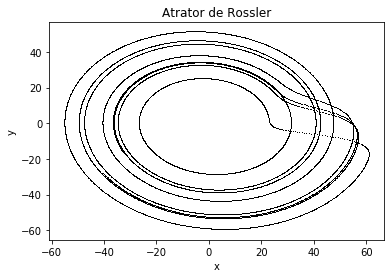

In [210]:
c=43
s=1
n = 50000 #number of time points
dt = 0.005 #interval between points
N = 2 #number of initial points
x0 = -10
y0 = -10
z0 = 1
plot2d(x0,y0,z0,c,15000,dt,1)

# 1b

In [3]:
def rk4_x (x: float, y: float, z: float, c: float, n: int,  dt: float):
    for i in range (n):
        (xa,ya,za) = ros(x,y,z,c)
        (xb,yb,zb) = ros(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,c)
        (xc,yc,zc) = ros(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,c)
        (xd,yd,zd) = ros(x+dt*xc,y+dt*yc,z+dt*zc,c)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
        yield x

In [232]:
def maiores_pontos (x0,y0,z0,c,n,dt,nint):
#Calcula os n pontos
    X = list(rk4_x(x0,y0,z0,c,n,dt)) 
#Seleciona só os últimos nint pontos (para descartar região transiente)
    X = X[-nint:] 
    x_points =[]
#Compara para cada ponto do vetor os pontos vizinhos para saber se é um máximo local
    for i in range(0,nint-1): 
        if(X[i]>X[i-1] and X[i]>X[i+1]):
            #se for, salva no vetor x_points
            x_points.append(X[i]) 
#Elimina pontos repetidos no caso de órbitas periódicas com períodos visíveis
    for i in range(len(x_points)-1):
        if (abs(x_points[0]-x_points[i+1])<0.04):
            x_points = x_points[:i+1]
            return x_points
    for i in range(len(x_points)-2):
        if (abs(x_points[1]-x_points[i+2])<0.04):
            x_points = x_points[:i+2]
            return x_points
#Reduz o tamanho do número de pontos que será plotado nos casos periódicos para 30 pontos 
    x_points = x_points[:20]
    return x_points

In [217]:
c=43
dt = 0.01 #interval between points
x = maiores_pontos(x0,y0,z0,40,30000,dt,10000)
print(x)

[52.31333642298849, 41.57688838885243, 55.0197516330176, 32.55481882334175, 44.5340132366796, 57.176836361122426, 28.245297856534105, 38.66656357065536, 52.19847976080411, 42.01609047418167, 55.394719282264134, 31.581878487113237, 43.216035974943395, 56.335141143992, 29.525941482379583, 40.415544856878434]


In [233]:
dt = 0.05 #interval between points
x_plot=[]
C=[]
n = 20000
nint = 10000
for i in range(900):
    x0 = rd.randint(-10,10) 
    y0 = rd.randint(-10,10)
    z0 = rd.randint(-1,1)
    c = 1 + i*0.05
    if (c>28.5):
        dt = 0.005 
        nint = 10000
        n = 25000
    xm = [*maiores_pontos(x0,y0,z0,c,n,dt,nint)]
    x_plot.extend(xm)
    for i in range(0,len(xm)):
        C.append(c)

%time

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 5.72 µs


In [230]:
#Parâmetros e simulação para 1<c<28.5
dt = 0.05
x_plot=[]
C=[]
n = 100000
nint = 6000
for i in range(550):
    x0 = rd.randint(-10,10) 
    y0 = rd.randint(-10,10)
    z0 = rd.randint(-1,1)
    c = 1 + i*0.05
    xm = [*maiores_pontos(x0,y0,z0,c,n,dt,nint)]
    x_plot.extend(xm)
    for i in range(0,len(xm)):
        C.append(c)

        
#Parâmetros e simulação para 28.5<c<46
dt = 0.01
nint = 12000
n = 100000
for i in range(875):
    x0 = rd.randint(-10,10) 
    y0 = rd.randint(-10,10)
    z0 = rd.randint(-1,1)
    c = 28.5 + i*0.02 
    xm = [*maiores_pontos(x0,y0,z0,c,n,dt,nint)]
    x_plot.extend(xm)
    for i in range(0,len(xm)):
        C.append(c)

Text(0.5, 1.0, 'Diagrama de Bifurcação para as Equações de Rossler')

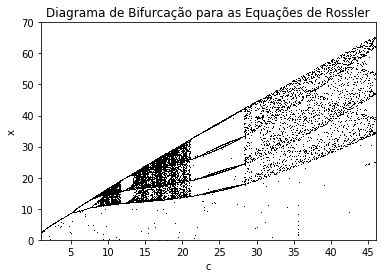

In [235]:
plt.xlim(1,46)
plt.ylim(0,70)
plt.xlabel('c')
plt.ylabel('x')
plt.plot(C, x_plot, 'k,') 
plt.title('Diagrama de Bifurcação para as Equações de Rossler')